# Template for hand-in on private clustering

Advanced Topics in Machine Learning, U. Copenhagen, fall 2023

Created by Rasmus Pagh

# Fetch and load dataset

The dataset consists of 3414 embedding vectors for first names from the GloVe dataset. Each vector is a 100-dimensional unit vector.

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

!curl -s https://rasmuspagh.net/data/glove.twitter.27B.100d.names.pickle -O
input_file = "glove.twitter.27B.100d.names.pickle"
with open(input_file, 'rb') as f:
    embedding = pickle.load(f)
names = list(embedding.keys())
points = np.array([ embedding[x] for x in names ])
n, d = points.shape

# Private implementation of cost computation and k-means algorithm

In [20]:
def compute_cost(points, centers):
    distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
    return np.mean(np.min(distances_squared, axis=0))


def k_means(points, k, t, rho):
    # Calculate the sigmas^2 based on rho 
    sigma_sum = (4*t)/rho
    sigma_size = (2*t)/rho
    
    
    initial_assignment = np.random.choice(range(k), n)
    cluster_indexes = [ (initial_assignment == i) for i in range(k) ]
    cluster_sizes = [ cluster_indexes[i].sum() for i in range(k) ]

    for l in range(t):
        # Adding noise to each cluster sum
        cluster_sums = [ np.sum(points[cluster_indexes[i] ] , axis=0) + np.random.normal(0,sigma_sum, d) for i in range(k) ]
        centers = np.array([ cluster_sums[i] / max(1, cluster_sizes[i]) for i in range(k) ])
        distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
        assignment = np.argmin(distances_squared, axis=0)
        cluster_indexes = [ (assignment == i) for i in range(k) ]
        # Adding noise to each cluster size. 
        cluster_sizes = [ cluster_indexes[i].sum()+ np.random.normal(0,sigma_size) for i in range(k) ]

    return centers

# Plot cost as function of rho

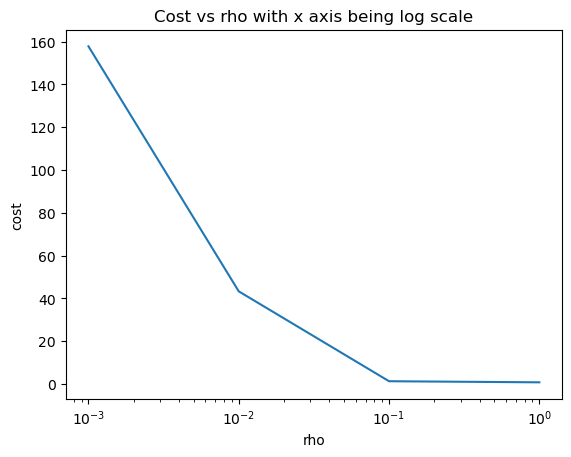

In [145]:
costs = []
rho_space = [0.001,0.01,0.1,1]
for rho in rho_space:    
        centers = k_means(points, 5, 5, rho)
        costs.append(compute_cost(points, centers))

fig, ax = plt.subplots()
ax.set_xlabel('rho')
ax.set_ylabel('cost')
ax.set_title("Cost vs rho with x axis being log scale")

ax.plot(rho_space, costs)
plt.xscale("log")
plt.show()


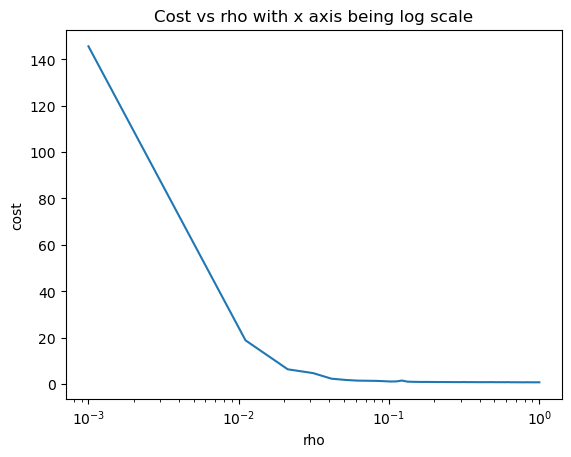

In [147]:
costs = []
rho_space = np.linspace(0.001,1, num = 100)
for rho in rho_space:    
        centers = k_means(points, 5, 5, rho)
        costs.append(compute_cost(points, centers))

fig, ax = plt.subplots()
ax.set_xlabel('rho')
ax.set_ylabel('cost')
ax.set_title("Cost vs rho with x axis being log scale")

ax.plot(rho_space, costs)
plt.xscale("log")
plt.show()

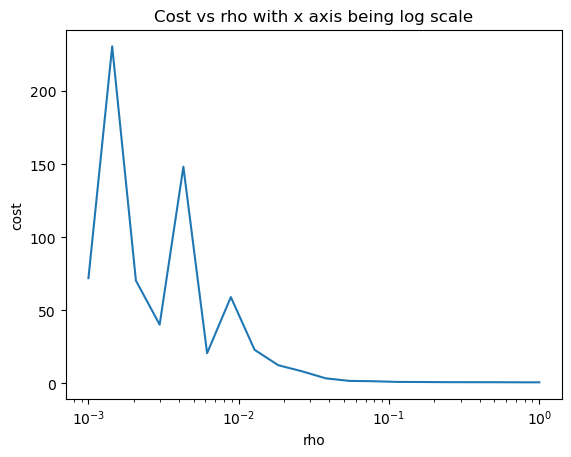

In [173]:
costs = []
rho_space = np.geomspace(0.001,1, num = 20)
for rho in rho_space:    
        centers = k_means(points, 5, 5, rho)
        costs.append(compute_cost(points, centers))

fig, ax = plt.subplots()
ax.set_xlabel('rho')
ax.set_ylabel('cost')
ax.set_title("Cost vs rho with x axis being log scale")

ax.plot(rho_space, costs)
plt.xscale("log")
plt.show()